![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [25]:
# Start your code here!
import pandas as pd

#Import the men's and women's csv files
men_df = pd.read_csv('men_results.csv')
women_df = pd.read_csv('women_results.csv')

#Filter both files to just matches on after Jan 1 2022
men_df = men_df[men_df['date'] >='2002-01-01']
women_df = women_df[women_df['date'] >='2002-01-01']

#Filter both files to just FIFA World Cup matches
men_df = men_df[men_df['tournament'] == 'FIFA World Cup']
women_df = women_df[women_df['tournament'] == 'FIFA World Cup']
men_df.info()
women_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  384 non-null    int64 
 1   date        384 non-null    object
 2   home_team   384 non-null    object
 3   away_team   384 non-null    object
 4   home_score  384 non-null    int64 
 5   away_score  384 non-null    int64 
 6   tournament  384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   date        200 non-null    object
 2   home_team   200 non-null    object
 3   away_team   200 non-null    object
 4   home_score  200 non-null    int64 
 5   away_score  200 non-null    int64 
 6   tournament  200 non-null    object
dtypes: int

Since the hypothesis is the mean number of goals, I need to add the home score and away scores together to get the total goals in each game.

In [26]:
men_df['total_goals'] = men_df['home_score'] + men_df['away_score']
women_df['total_goals'] = women_df['home_score'] + women_df['away_score']


Now, I'll determine what type of hypothesis test is appropriate. For that, I need to check the dataframes for normal distribution. Because they are two different groups, we will assume independence.

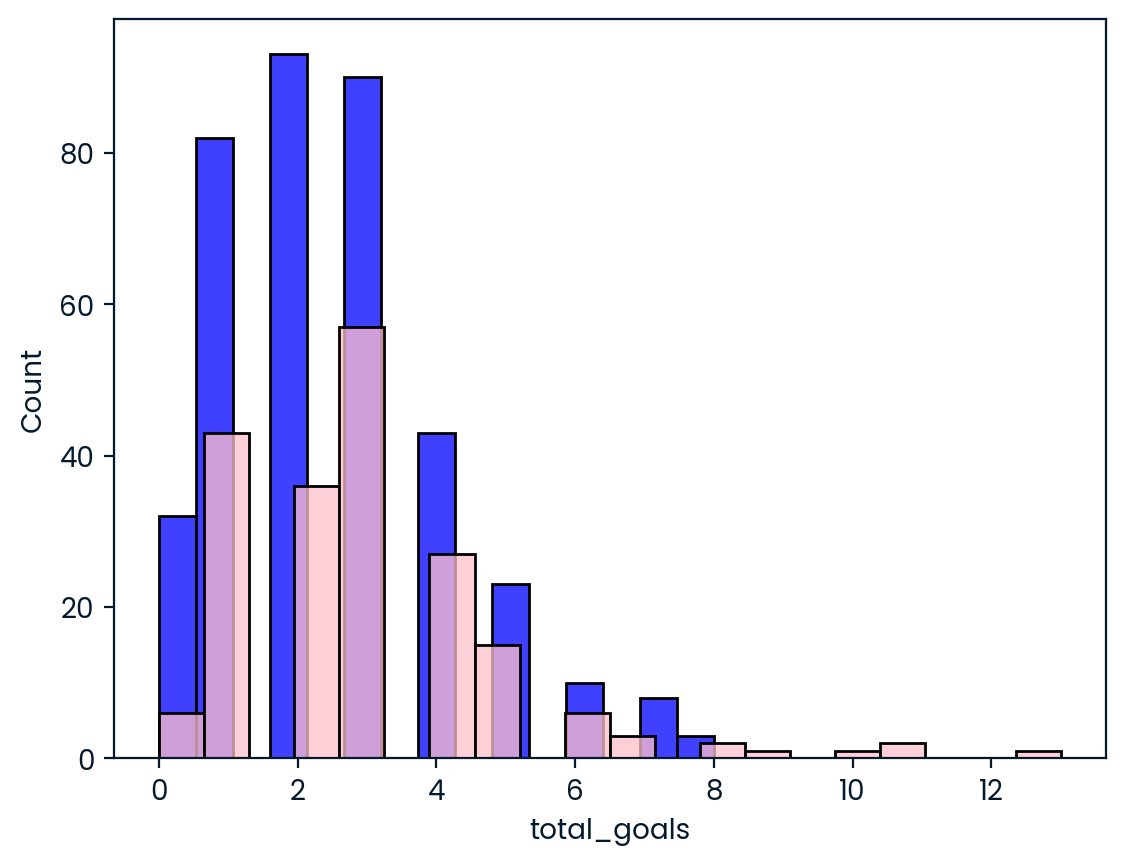

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=men_df, x='total_goals', color = 'blue')
sns.histplot(data=women_df, x='total_goals', color = 'pink')
plt.show()


Both histogram plots show a right tailed distribution, so the normality assumption is false. For this reason, I'll need to use a non-parametric test. I'll use the Wilcoxon-Mann-Whitney test to determine if the average goals between men's and women's matches are different, because it allows for non-normality assuming the distributions has a similar shape, as we see above. 

The Wilcoxon-Mann-Whitney U test requires just the average goals from the men's and women's matches.

In [28]:
# Calculate the average goals for the men's and women's matches
mens_avg_goals = men_df['total_goals'].mean()
womens_avg_goals = women_df['total_goals'].mean()
print("Men avg goals: {:.2f}".format(mens_avg_goals))
print("Women avg goals: {:.2f}".format(womens_avg_goals))

#create dfs of just the group and total goals for mens and womens dataframes
men_df['group'] = 'men'
women_df['group'] = 'women'

# Create dataframes of just the total goals and the group
mens_goals = men_df[['group', 'total_goals']]
womens_goals = women_df[['group', 'total_goals']]

#Merge the dataframes together and pivot to use in the pingouin mwu function
merged_df = pd.concat([mens_goals, womens_goals], axis=0, ignore_index=True)
merged_wide_df = merged_df.pivot(columns='group', values = 'total_goals')


# import pingouin for mwu function
import pingouin as pg
pg.mwu(merged_wide_df['women'],merged_wide_df['men'],alternative='greater')


Men avg goals: 2.51
Women avg goals: 2.98


,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


Because the p value is 0.005, and our alpha is 0.1, we can reject the null hypothesis and conclude that women's FIFA matches have more goals on average than men's FIFA matches.